# **Preproccessing** #

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: creditcard.csv          


In [ ]:
!pip install dbscan==0.0.12

In [ ]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from dbscan import DBSCAN
import torch.functional as f
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torch.distributions import Normal, kl
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df['Time'] = mm_scaler.fit_transform(df[['Time']])
df['Amount'] = std_scaler.fit_transform(df[['Amount']])

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# gan/vae
mm_scaler = MinMaxScaler()

df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',]] = mm_scaler.fit_transform(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',]])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [ ]:
fraud_df = df[df['Class'] == 1]

In [ ]:
normal_df = df[df['Class'] == 0]

In [ ]:
fraud_x, fraud_y = fraud_df.iloc[:, :-1], fraud_df.iloc[:, -1]

In [ ]:
normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(normal_df.iloc[:, :-1], normal_df.iloc[:, -1], test_size=0.2, stratify=normal_df.iloc[:, -1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, stratify=df.iloc[:, -1])

In [ ]:
sm = SMOTE(random_state=42)

smote_x_train, smote_y_train = sm.fit_resample(x_train, y_train)

In [ ]:
class CreditcardDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x.to_numpy()).to(torch.float)
    self.y = torch.tensor(y.to_numpy()).to(torch.float)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [ ]:
only_fraud_dataset = CreditcardDataset(fraud_x, fraud_y)

In [ ]:
len(only_fraud_dataset)

492

In [ ]:
smote_train_dataset = CreditcardDataset(smote_x_train, smote_y_train)
test_dataset = CreditcardDataset(x_test, y_test)

In [ ]:
normal_train_dataset = CreditcardDataset(normal_x_train, normal_y_train)
normal_test_dataset = CreditcardDataset(normal_x_test, normal_y_test)

In [ ]:
train_dataset = CreditcardDataset(x_train, y_train)
test_dataset = CreditcardDataset(x_test, y_test)

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
print(f'GPU mem: {int(torch.cuda.get_device_properties(0).total_memory/1e9+.5)}G')

GPU mem: 16G


In [ ]:
batchsize = 10000

In [ ]:
fraud_dataloader = DataLoader(only_fraud_dataset, shuffle=True, drop_last=True, batch_size=batchsize)

In [ ]:
smote_train_dataloader = DataLoader(smote_train_dataset, shuffle=True, drop_last=True, batch_size=batchsize)
test_dataloader = DataLoader(test_dataset, shuffle=True, drop_last=True, batch_size=batchsize)

In [ ]:
normal_train_dataloader = DataLoader(normal_train_dataset, shuffle=True, drop_last=True, batch_size=batchsize)
normal_test_dataloader = DataLoader(normal_test_dataset, shuffle=True, drop_last=True, batch_size=batchsize)

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, drop_last=True, batch_size=batchsize)
test_dataloader = DataLoader(test_dataset, shuffle=True, drop_last=True, batch_size=batchsize)

# **VAE** #

In [ ]:
class VAE(nn.Module):
  def __init__(self, latent_dim, encoder_dims, decoder_dims, batch_size, num_samples, num_features, kld_weight):
    super(VAE, self).__init__()
    self.prior = Normal(torch.zeros(latent_dim), torch.ones(latent_dim))
    self.encoder_dims = encoder_dims
    self.decoder_dims = decoder_dims
    self.batch_size = batch_size
    self.latent_dim = latent_dim
    self.num_samples = num_samples
    self.num_features = num_features
    self.reconstruction_loss = nn.MSELoss()
    self.kld_weight = kld_weight

    encoder_modules = []
    for i in range(1, len(self.encoder_dims)):
      linear_block = nn.Sequential(
          nn.Linear(self.encoder_dims[i-1], self.encoder_dims[i]),
          nn.BatchNorm1d(self.encoder_dims[i]),
          nn.ReLU()
      )
      encoder_modules.append(linear_block)

    decoder_modules = []
    for i in range(1, len(self.decoder_dims)):
      linear_block = nn.Sequential(
          nn.Linear(self.decoder_dims[i-1], self.decoder_dims[i]),
          nn.BatchNorm1d(self.decoder_dims[i]),
          nn.ReLU()
      )
      decoder_modules.append(linear_block)

    self.encoder = nn.Sequential(*encoder_modules)
    self.decoder = nn.Sequential(*decoder_modules)

    self.encoder_mu = nn.Linear(self.encoder_dims[-1], self.latent_dim)
    self.encoder_logvar = nn.Linear(self.encoder_dims[-1], self.latent_dim)

    self.decoder_mu = nn.Sequential(nn.Linear(self.decoder_dims[-1], self.num_features), nn.Sigmoid())
    self.decoder_logvar = nn.Linear(self.decoder_dims[-1], self.num_features)



  def forward(self, x):
    mu, logvar = self.encode(x)  # mu (batch_size x latent_dim), logvar (batch_size x latent_dim)

    z, kld = self.reparametrize(mu, logvar)  # z (batch_size * num_samples x latent_dim)

    mu, logvar = self.decode(z) # mu (batch_size * num_samples x num_features), logvar (batch_size * num_samples x num_features)

    return mu, logvar, kld


  def encode(self, x):
    x = self.encoder(x)
    mu = self.encoder_mu(x)
    logvar = self.encoder_logvar(x)
    return mu, logvar

  def reparametrize(self, mu, logvar):
    kld = torch.mean(-0.5 * torch.sum(1 + logvar - mu ** 2 - logvar.exp(), dim = 1), dim = 0)
    std = torch.exp(0.5 * logvar)

    if self.num_samples == 1:
      eps = torch.randn_like(std)
      z = eps * std + mu
    else:
      z = torch.tensor([])
      for i in range(len(mu)):
        distribution = Normal(loc=mu[i], scale=std[i])
        samples = distribution.rsample((self.num_samples,))
        z = torch.cat([z, samples])
    return z, kld

  def decode(self, z):
    z = self.decoder(z)
    mu = self.decoder_mu(z)
    logvar = self.decoder_logvar(z)
    return mu, logvar

  def loss(self, x, mu, logvar, kld):
    loss = self.kld_weight * kld
    #std = torch.exp(0.5 * logvar)

    for i in range(len(x)):
      for j in range(i*self.num_samples, i*self.num_samples + self.num_samples):
        '''
        distribution = Normal(loc=mu[j], scale=std[j])
        logprob = torch.sum(distribution.log_prob(x[i]))
        loss -= logprob
        '''
        loss += self.reconstruction_loss(x[i], mu[j])
    return loss


  def generate(self, n):
    z = self.prior.sample((n,))
    mu, logvar = self.decode(z)
    return mu, logvar


In [ ]:
loss_history = []

In [ ]:
latent_dim = 10
num_features = 29
encoder_dims = [num_features, 128, 256, 64]
decoder_dims = [latent_dim, 64, 128, 64]
batch_size = 98
num_samples = 5
num_epochs = 400

model = VAE(latent_dim, encoder_dims, decoder_dims, batch_size, num_samples, num_features)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

for epoch in range(num_epochs):
  for x,y in fraud_dataloader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()

    mu, logvar, kld = model.forward(x)

    loss = model.loss(x, mu, logvar, kld)

    loss.backward()
    optimizer.step()

  loss_history.append(loss)

  print('\nepoch: ', epoch, '\nloss: ', loss)


torch.save(model.state_dict(), "vae_state_dict.pt")
torch.save(model, "vae.pt")

In [ ]:
loss_history[-1]

tensor(6918.6069, grad_fn=<AddBackward0>)

# **GAN** #

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, discriminator_dims, batch_size, num_features):
    super(Discriminator, self).__init__()
    self.discriminator_dims = discriminator_dims
    self.batch_size = batch_size
    self.num_features = num_features
    self.adversarial_loss = nn.BCELoss()

    discriminator_modules = []
    for i in range(1, len(self.discriminator_dims)):
      linear_block = nn.Sequential(
          nn.Linear(self.discriminator_dims[i-1], self.discriminator_dims[i]),
          nn.ReLU(),
          nn.Dropout(0.3)
      )
      discriminator_modules.append(linear_block)

    self.discriminator_final = nn.Sequential(nn.Linear(self.discriminator_dims[-1], 1),
                                             nn.Sigmoid())

    self.discriminator = nn.Sequential(nn.Sequential(*discriminator_modules), self.discriminator_final)

  def forward(self, x):
    return self.discriminator(x)

  def discriminator_loss(self, real_x, gen_x):
    # label smoothing
    ones = torch.ones(self.batch_size).unsqueeze(1) - 0.1
    zeros = torch.zeros(self.batch_size).unsqueeze(1) + 0.1

    real_labels = self.discriminator(real_x)
    fake_labels = self.discriminator(gen_x)

    labels = torch.cat((real_labels, fake_labels))
    target = torch.cat((ones, zeros))

    total_loss = self.adversarial_loss(labels, target)

    return total_loss



class Generator(nn.Module):
  def __init__(self, latent_dim, generator_dims, batch_size, num_features):
    super(Generator, self).__init__()
    self.prior = Normal(torch.zeros(latent_dim), torch.ones(latent_dim))
    self.generator_dims = generator_dims
    self.batch_size = batch_size
    self.latent_dim = latent_dim
    self.num_features = num_features
    self.adversarial_loss = nn.BCELoss()

    generator_modules = []
    for i in range(1, len(self.generator_dims)):
      linear_block = nn.Sequential(
          nn.Linear(self.generator_dims[i-1], self.generator_dims[i]),
          nn.ReLU()
      )
      generator_modules.append(linear_block)

    self.generator_final = nn.Sequential(nn.Linear(self.generator_dims[-1], self.num_features),
                                         nn.Sigmoid())
    self.generator = nn.Sequential(nn.Sequential(*generator_modules), self.generator_final)

  def generate(self, n):
    z = self.prior.sample((n,))
    x = self.generator(z)
    return x

  def generator_loss(self, fake_labels):
    ones = torch.ones(self.batch_size).unsqueeze(1)

    total_loss = self.adversarial_loss(fake_labels, ones)

    return total_loss

In [ ]:
loss_history2 = []

In [ ]:
latent_dim = 10
num_features = 29
generator_dims = [latent_dim, 64, 128, num_features]
discriminator_dims = [num_features, 64, 128, 64]
batch_size = 98
num_epochs = 400
k_steps = 3

generator = Generator(latent_dim, generator_dims, batch_size, num_features)
discriminator = Discriminator(discriminator_dims, batch_size, num_features)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-2)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-2)
generator_scheduler = torch.optim.lr_scheduler.StepLR(generator_optimizer, step_size=100, gamma=0.1)
discriminator_scheduler = torch.optim.lr_scheduler.StepLR(discriminator_optimizer, step_size=100, gamma=0.1)

for epoch in range(num_epochs):
  for x, y in fraud_dataloader:
    x = x.to(device)
    y = y.to(device)

    for k in range(k_steps):
      generator_optimizer.zero_grad()
      discriminator_optimizer.zero_grad()
      gen_x = generator.generate(batch_size)
      discriminator_loss = discriminator.discriminator_loss(x, gen_x)
      discriminator_loss.backward(retain_graph=True)
      discriminator_optimizer.step()

    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()
    fake_labels = discriminator.forward(gen_x)
    generator_loss = generator.generator_loss(fake_labels)
    generator_loss.backward(retain_graph=True)
    generator_optimizer.step()

  loss = (generator_loss + discriminator_loss) / 2
  loss_history2.append(loss)

  print('\nepoch: ', epoch, '\nloss: ', loss)


torch.save(generator.state_dict(), "generator_state_dict.pt")
torch.save(generator, "generator.pt")
torch.save(discriminator.state_dict(), "discriminator.pt")
torch.save(discriminator, "discriminator.pt")

# **VAE Test** #

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=1)
data = digits.data
targets = digits.target

In [ ]:
data.shape

(178, 64)

In [ ]:
loss_history = []

In [ ]:
latent_dim = 10
num_features = 64
encoder_dims = [num_features, 1024, 256, 64]
decoder_dims = [latent_dim, 64, 128, 64]
batch_size = 178
num_samples = 1
num_epochs = 400

model = VAE(latent_dim, encoder_dims, decoder_dims, batch_size, num_samples, num_features)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

for epoch in range(num_epochs):
  x = torch.tensor(data).to(device).to(torch.float)
  optimizer.zero_grad()

  mu, logvar, kld = model.forward(x)

  loss = model.loss(x, mu, logvar, kld)

  loss.backward()
  optimizer.step()

  loss_history.append(loss)

  print('\nepoch: ', epoch, '\nloss: ', loss)


torch.save(model.state_dict(), "mnist_vae_state_dict.pt")
torch.save(model, "mnist_vae.pt")

In [ ]:
#model = torch.load('mnist_vae.pt', weights_only=False)
mu, logvar = model.generate(10)
std = torch.exp(0.5 * logvar)
distribution = Normal(loc=mu[0], scale=std[0])
samples = distribution.sample((10,))

fake_x = samples.detach().numpy()

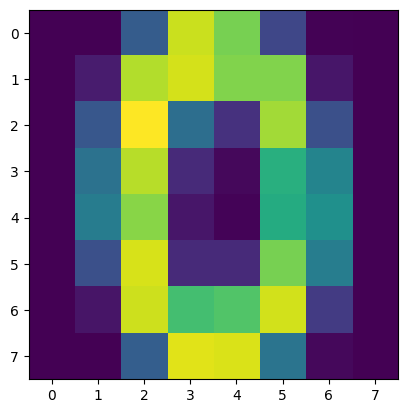

In [ ]:
plt.imshow(mu[0].detach().numpy().reshape(8,8))

# **GAN Test** #

In [ ]:
from sklearn.datasets import load_digits
from sklearn import preprocessing

digits = load_digits(n_class=1)
data = digits.data
targets = digits.target

data = preprocessing.minmax_scale(data.T).T

In [ ]:
latent_dim = 30
num_features = 64
generator_dims = [latent_dim, 256, 512, 1024, 512]
discriminator_dims = [num_features, 256, 128, 64, 32]
batch_size = 178
num_epochs = 80
k_steps = 3
step_size = 25

generator = Generator(latent_dim, generator_dims, batch_size, num_features)
discriminator = Discriminator(discriminator_dims, batch_size, num_features)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
generator_scheduler = torch.optim.lr_scheduler.StepLR(generator_optimizer, step_size=step_size, gamma=0.1)
discriminator_scheduler = torch.optim.lr_scheduler.StepLR(discriminator_optimizer, step_size=step_size, gamma=0.1)

for epoch in range(num_epochs):
  x = torch.tensor(data).to(device).to(torch.float)

  generator.zero_grad()
  gen_x = generator.generate(batch_size)
  fake_labels = discriminator.forward(gen_x)
  generator_loss = generator.generator_loss(fake_labels)
  generator_loss.backward()
  generator_optimizer.step()


  discriminator.zero_grad()
  discriminator_loss = discriminator.discriminator_loss(x, gen_x.detach())
  discriminator_loss.backward()
  discriminator_optimizer.step()

  loss = (generator_loss + discriminator_loss) / 2
  #loss_history2.append(loss)

  print('\nepoch: ', epoch, '\nloss: ', loss, '\ngenerator loss', generator_loss, '\ndiscriminator loss', discriminator_loss)


torch.save(generator.state_dict(), "mnist_generator_state_dict.pt")
torch.save(generator, "mnist_generator.pt")
torch.save(discriminator.state_dict(), "mnist_discriminator.pt")
torch.save(discriminator, "mnist_discriminator.pt")

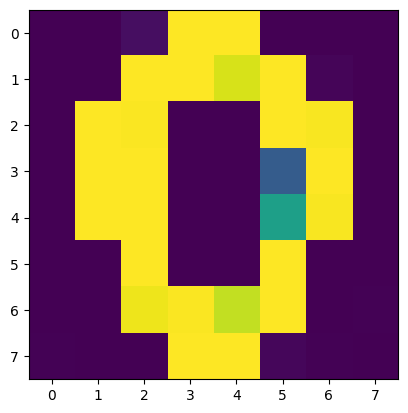

In [ ]:
generator.eval()
gen_x = generator.generate(100)
plt.imshow(gen_x[13].detach().numpy().reshape(8,8))

# **Anomaly detection** #

In [ ]:
fraud_percentage = 0.00172

In [ ]:
y_test.value_counts()

,count
Class,
0,56864
1,98


## **Isolation Forest** ##

In [ ]:
iforest = IsolationForest()

iforest.fit(x_train)

y_pred = iforest.predict(x_test)

print(classification_report(y_test, y_pred == -1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.81      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.88      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
iforest = IsolationForest(contamination=fraud_percentage)

iforest.fit(x_train)

y_pred = iforest.predict(x_test)

print(classification_report(y_test, y_pred == -1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.23      0.26      0.24        98

    accuracy                           1.00     56962
   macro avg       0.62      0.63      0.62     56962
weighted avg       1.00      1.00      1.00     56962



## **DBSCAN** ##

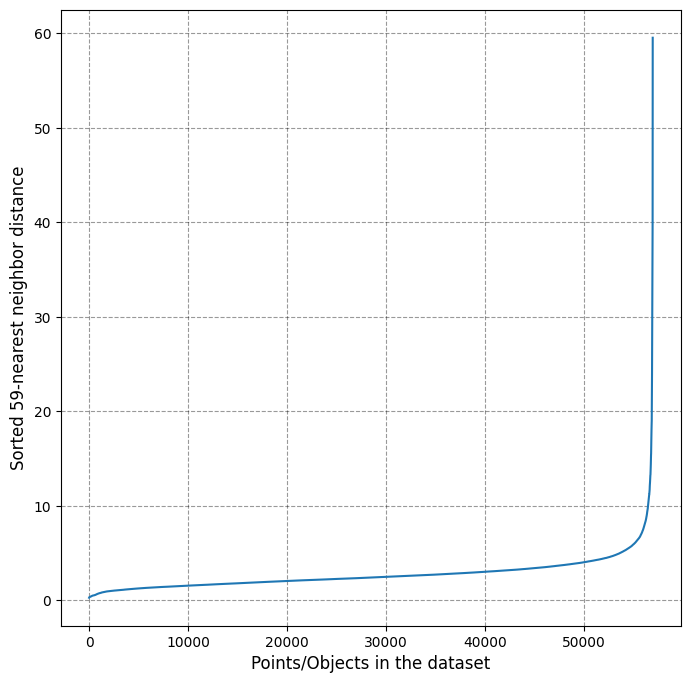

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * x_test.shape[-1] - 1
get_kdist_plot(X=x_test, k=k)

In [ ]:
x_test.shape

(56962, 30)

In [ ]:
x_test20 = SelectKBest(k=20).fit_transform(x_test, y_test)

In [ ]:
labels, core_samples_mask = DBSCAN(x_test20, eps=7, min_samples=60)

In [ ]:
print(classification_report(y_test, labels == -1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.72      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.86      0.64     56962
weighted avg       1.00      0.99      1.00     56962



## **Autoencoder** ##

In [ ]:
input_dim = 30
hidden_dim = 15
num_epochs = 50

model = nn.Sequential(nn.Linear(30, 15),
                      nn.ReLU(),
                      nn.Linear(15, 30)
                      )

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss = nn.MSELoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in tqdm(range(num_epochs)):
  for x, y in train_dataloader:
    x = torch.tensor(x).to(device).to(torch.float)
    model.zero_grad()
    recon = model(x)
    loss_value = loss(recon, x)
    loss_value.backward()
    optimizer.step()

  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-50-a6abbd284ca7>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device).to(torch.float)
100%|██████████| 50/50 [02:46<00:00,  3.33s/it]


In [ ]:
torch.save(model, 'autoencoder.pt')

In [ ]:
fraud_percentage = 0.172
test_input = torch.tensor(x_test.to_numpy()).to(device).to(torch.float)
reconstructed_data = model(test_input)
reconstruction_errors = np.mean(np.square(x_test.to_numpy() - reconstructed_data.detach().numpy()), axis=1)
threshold = np.percentile(reconstruction_errors, 100 - fraud_percentage)
labels = np.where(reconstruction_errors > threshold, -1, 0)

In [ ]:
print(classification_report(y_test, labels == -1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.24      0.24        98

    accuracy                           1.00     56962
   macro avg       0.62      0.62      0.62     56962
weighted avg       1.00      1.00      1.00     56962



## **VAE** ##

In [ ]:
x_train.shape

(227845, 30)

In [ ]:
loss_history = []

In [ ]:
latent_dim = 8
num_features = 30
encoder_dims = [num_features, 8, 5]
decoder_dims = [latent_dim, 60, 20]
batch_size = 10000
num_samples = 1
num_epochs = 200
step_size = 100
kld_weight = 10

model = VAE(latent_dim, encoder_dims, decoder_dims, batch_size, num_samples, num_features, kld_weight)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

for epoch in tqdm(range(num_epochs)):
  total_loss = 0
  for x,y in train_dataloader:
    x = torch.tensor(x).to(device).to(torch.float)
    optimizer.zero_grad()

    mu, logvar, kld = model.forward(x)

    loss = model.loss(x, mu, logvar, kld)

    loss.backward()
    optimizer.step()
    total_loss += loss.detach().cpu().numpy()

  #loss_history.append(total_loss)

  print('\nepoch: ', epoch, '\nloss: ', loss)


torch.save(model.state_dict(), "credit_vae_state_dict.pt")
torch.save(model, "credit_vae.pt")

In [ ]:
model = torch.load('credit_vae.pt', weights_only=False)
fraud_percentage = 0.172
test_input = torch.tensor(x_test.to_numpy()).to(device).to(torch.float)
mu, logvar, kld = model.forward(test_input)
reconstruction_errors = np.mean(np.square(x_test.to_numpy() - mu.detach().cpu().numpy()), axis=1)
threshold = np.percentile(reconstruction_errors, 100 - fraud_percentage)
labels = np.where(reconstruction_errors > threshold, -1, 0)

In [ ]:
print(classification_report(y_test, labels == -1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.45      0.45        98

    accuracy                           1.00     56962
   macro avg       0.72      0.72      0.72     56962
weighted avg       1.00      1.00      1.00     56962



## **GAN**

In [ ]:
latent_dim = 10
num_features = 30
generator_dims = [latent_dim, 16, 32]
discriminator_dims = [num_features, 32, 16]
batch_size = 10000
num_epochs = 600
k_steps = 3
step_size = 200

generator = Generator(latent_dim, generator_dims, batch_size, num_features)
discriminator = Discriminator(discriminator_dims, batch_size, num_features)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=2e-4)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=2e-4)
generator_scheduler = torch.optim.lr_scheduler.StepLR(generator_optimizer, step_size=step_size, gamma=0.1)
discriminator_scheduler = torch.optim.lr_scheduler.StepLR(discriminator_optimizer, step_size=step_size, gamma=0.1)

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dataloader:
    x = x_batch.to(device)

    generator.zero_grad()
    gen_x = generator.generate(batch_size)
    fake_labels = discriminator.forward(gen_x)
    generator_loss = generator.generator_loss(fake_labels)
    generator_loss.backward()
    generator_optimizer.step()


    discriminator.zero_grad()
    discriminator_loss = discriminator.discriminator_loss(x, gen_x.detach())
    discriminator_loss.backward()
    discriminator_optimizer.step()

    loss = (generator_loss + discriminator_loss) / 2
  #loss_history2.append(loss)

  print('\nepoch: ', epoch, '\nloss: ', loss, '\ngenerator loss', generator_loss, '\ndiscriminator loss', discriminator_loss)


torch.save(generator.state_dict(), "credit_generator_state_dict.pt")
torch.save(generator, "credit_generator.pt")
torch.save(discriminator.state_dict(), "credit_discriminator_state_dict.pt")
torch.save(discriminator, "credit_discriminator.pt")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
generator = torch.load('credit_generator.pt', weights_only=False).to(device)
discriminator = torch.load('credit_discriminator.pt', weights_only=False).to(device)
generator.eval()
discriminator.eval()

pred_labels = []
true_labels = []

for x_batch, y_batch in test_dataloader:
    x = x_batch.to(device)

    generator.zero_grad()
    discriminator.zero_grad()

    labels = discriminator.forward(x)
    pred_labels.append(labels)
    true_labels.append(y_batch)

In [ ]:
pred = torch.cat(pred_labels, dim=0).squeeze(1).detach().numpy()
true = torch.cat(true_labels, dim=0).detach().numpy()

In [ ]:
fraud_percentage = 0.172
threshold = np.percentile(pred, fraud_percentage)
final_pred = np.where(pred < threshold, 1, 0)

In [ ]:
print(classification_report(true, final_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     49917
         1.0       0.53      0.55      0.54        83

    accuracy                           1.00     50000
   macro avg       0.77      0.78      0.77     50000
weighted avg       1.00      1.00      1.00     50000



# **Результаты**

[Text(0, 0, '0.26'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.24'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.55')]

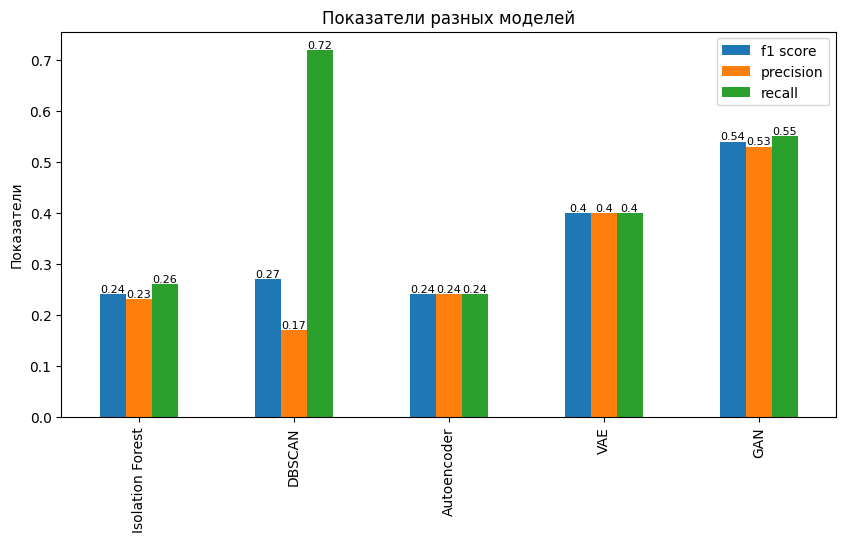

In [ ]:
df_metrics = pd.DataFrame({'model':['Isolation Forest', 'DBSCAN', 'Autoencoder', 'VAE', 'GAN'],
                            'f1 score':[0.24, 0.27, 0.24, 0.4, 0.54],
                            'precision':[0.23, 0.17, 0.24, 0.4, 0.53],
                            'recall':[0.26, 0.72, 0.24, 0.4, 0.55]})

fig, ax = plt.subplots(1, figsize=(10,5))
df_metrics.plot(kind='bar', ax=ax)
ax.set_xticks([0,1,2,3,4], ['Isolation Forest', 'DBSCAN', 'Autoencoder', 'VAE', 'GAN'])
ax.set_ylabel('Показатели')
ax.set_title('Показатели разных моделей')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize=8)
ax.bar_label(ax.containers[2], label_type='edge', fontsize=8)
